In [3]:
import json
   
# Opening JSON file
f = open('fp_base_1.json', encoding='UTF-8')
   
# returns JSON object as 
# a dictionary
data = json.load(f)
   
# Iterating through the json
# list
print(len(data))
# for i in data:
#     print(i)
#     break
for i in data:
    print("")
    # print("Type:", type(i))
    # print(i)
    print(i['name'])
    print(i['seq'])
    # print(i['qy'])
    # print(i['states'])
    # print("Type:", type(i['states']))
    print(i['states'][0]['qy'])
    print(i['states'][0]['brightness'])
    print(i['states'][0]['em_max'])
    print(i['states'][0]['ex_max'])
    break
# Closing file
f.close()

print("")
f2 = open('fp_base_1_spectra.json', encoding='UTF-8')
data2 = json.load(f2)
print(len(data2))
# for i in data2[1]:
#     print(i)
#     break
for i in data2:
    print("")
    # print("Type:", type(i))
    print(i['name'])
    
    print(i['spectra'][0]['state'])
    print(i['spectra'][0]['max'])
    spectrum_ex = i['spectra'][0]['data']
    print("len(spectrum_ex) " + str(len(spectrum_ex)))
    # print(spectrum_ex)
    
    print(i['spectra'][1]['state'])
    print(i['spectra'][1]['max'])
    spectrum_em = i['spectra'][1]['data']
    print("len(spectrum_em) " + str(len(spectrum_em)))
    # print(spectrum_em)
    break
    

533

aacuGFP1
MSLSKHGITQEMPTKYHMKGSVNGHEFEIEGVGTGHPYEGTHMAELVIIKPAGKPLPFSFDILSTVIQYGNRCFTKYPADLPDYFKQAYPGGMSYERSFVYQDGGIATASWNVGLEGNCFIHKSTYLGVNFPADGPVMTKKTIGWDKAFEKMTGFNEVLRGDVTEFLMLEGGGYHSCQFHSTYKPEKPVELPPNHVIEHHIVRTDLGKTAKGFMVKLVQHAAAHVNPLKVQ
0.61
22.51
502
478

285

AausFP1
default_ex
504
len(spectrum_ex) 450
default_em
510
len(spectrum_em) 214


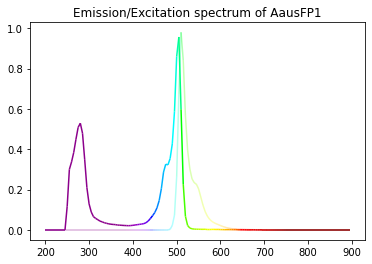

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

def wavelength_to_rgb(wavelength, gamma=0.8, alpha=0.5, factor=1.0):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R*factor,G*factor,B*factor, alpha)


import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


def plot_spectrum(spectrum, x_start=200, x_stop=900, x_step=5, alpha=0.5):
    x = np.arange(x_start, x_stop, x_step)
    colorlist = np.asarray(list(zip([wavelength_to_rgb(w, alpha) for w in x]))).squeeze(1)[:-1]
    spectrum_array = np.asarray(spectrum)
    y = np.zeros_like(x) + 0.0
    for index, pos_x in enumerate(x):
        for spectrum_value_pair in spectrum_array:
            if((spectrum_value_pair[0]>pos_x-x_step/2) and (spectrum_value_pair[0]<pos_x+x_step/2)):
                y[index] = y[index] + spectrum_value_pair[1]/ (x_step*1.0)
    xy = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.hstack([xy[:-1], xy[1:]])
    return segments, colorlist


fig, ax = plt.subplots()

segments, colorlist = plot_spectrum(spectrum_em)
lc = LineCollection(segments, colors=colorlist, alpha = 0.3)
ax.add_collection(lc)

segments, colorlist = plot_spectrum(spectrum_ex)
lc = LineCollection(segments, colors=colorlist, alpha=1.0)
ax.add_collection(lc)

ax.autoscale()
ax.set_title('Emission/Excitation spectrum of AausFP1')
plt.show()

# plt.savefig('WavelengthColors.png', dpi=200)
# plt.show()

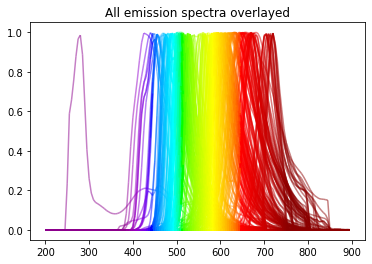

In [5]:
fig, ax = plt.subplots()

for i in data2:
    spectrum_em = i['spectra'][1]['data']

    segments, colorlist = plot_spectrum(spectrum_em)
    lc = LineCollection(segments, colors=colorlist)
    ax.add_collection(lc)

ax.autoscale()
ax.set_title('All emission spectra overlayed')
plt.show()

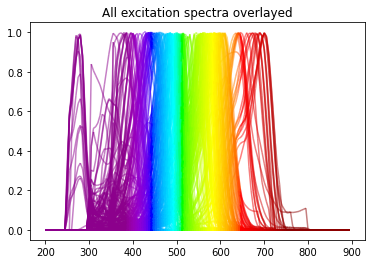

In [6]:
fig, ax = plt.subplots()

for i in data2:
    spectrum_ex = i['spectra'][0]['data']

    segments, colorlist = plot_spectrum(spectrum_ex)
    lc = LineCollection(segments, colors=colorlist)
    ax.add_collection(lc)

ax.autoscale()
ax.set_title('All excitation spectra overlayed')
plt.show()

In [7]:
seq_array = []
for i in data:
    sequence = i['seq']
    if(len(str(sequence))>10): #  and (len(str(sequence))<400):
        seq_array.append(sequence)
        
print(len(seq_array))


512


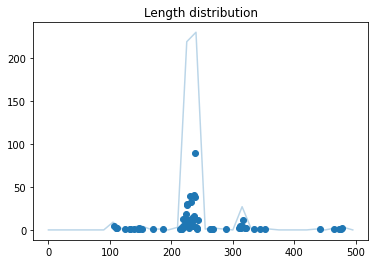

In [8]:
length_distribution_value = []
length_distribution_count = []
for seq in seq_array:
    length = len(str(seq))
    if(length in length_distribution_value):
        length_distribution_count[length_distribution_value.index(length)] += 1
    else:
        length_distribution_value.append(length)
        length_distribution_count.append(1)
        
length_histogram = np.array([length_distribution_value, length_distribution_count]).T.reshape(-1, 1, 2)
# print(length_histogram)
fig, ax = plt.subplots()

plt.scatter(length_distribution_value, length_distribution_count)

x_step = 15
x_list = np.arange(0,500,x_step)
y_list = np.zeros_like(x_list)+0.0

for index, value in enumerate(length_distribution_value):
    y_list[int(value/x_step + 0.5)] += length_distribution_count[index]

plt.plot(x_list, y_list, alpha = 0.3)
    
ax.autoscale()
ax.set_title('Length distribution')
plt.show()

In [9]:
print(seq_array[0])
print(seq_array[1])
print(seq_array[2])

MSLSKHGITQEMPTKYHMKGSVNGHEFEIEGVGTGHPYEGTHMAELVIIKPAGKPLPFSFDILSTVIQYGNRCFTKYPADLPDYFKQAYPGGMSYERSFVYQDGGIATASWNVGLEGNCFIHKSTYLGVNFPADGPVMTKKTIGWDKAFEKMTGFNEVLRGDVTEFLMLEGGGYHSCQFHSTYKPEKPVELPPNHVIEHHIVRTDLGKTAKGFMVKLVQHAAAHVNPLKVQ
MSYSKQGIVQEMKTKYRMEGSVNGHEFTIEGVGTGYPYEGKQMSELVIIKPKGKPLPFSFDILSSVFQYGNRCFTKYPADMPDYFKQAFPDGMSYERSFLFEDGAVATASWNIRLEGNCFIHNSIFHGVNFPADGPVMKKKTIGWDKSFEKMTVSKEVLRGDVTMFLMLEGGGYHRCQFHSTYKTEKPVELPPNHVVEHQIVRTDLGQSAKGFTVKLEAHAAAHVNPLKVQ
MSYGALLFREKIPYVVEMEGDVEGMKFSVRGKGHGDANTGKIEASFICTTGELPVPWSSILTTVTYGAQCFAKYPNDIKDYPKSAMPEGYVQERTITFENDGVYKTRAEVTYEKGSVYNRVTLNGSGFKKGGNILGKKLEFNYNPHCIYVLPDVQNNGIKCYINIVHDVIGGGQIIAAHQQLNTPLGGGPVDIPHYHHIQAHTILSKDPKETRDHMNVVEVFRAIDCKTAYA


In [10]:
amino_distribution = np.zeros((28,480))

for seq in seq_array:
    for index, amino in enumerate(seq):
        letter_number = ord(amino) - ord('A') + 1
        amino_distribution[letter_number, index] = amino_distribution[letter_number, index] + 1
        

max_sequence = []
probabilities= []
# print(len(amino_distribution[:,0]))
for index, _ in enumerate(amino_distribution[0]):
    char_index = np.argwhere( amino_distribution[:,index] == np.amax(amino_distribution[:,index]))[0][0]
    if(char_index>0) and (sum(amino_distribution[:, index])>sum(amino_distribution[:, 1])*0.33):
        max_sequence.append(chr(char_index + ord('A') - 1))
        # probabilities.append(str(int(10*np.amax(amino_distribution[:,index])/np.sum(amino_distribution[:, index]))))
        probabilities.append(str(round(np.amax(amino_distribution[:,index])/np.sum(amino_distribution[:, index]),2)))

print(''.join(max_sequence))
print(' '.join(probabilities))

MVSKGEELFTGVVPILVELGGVVNGHFFGVGGEGEGDATGGKLTKKFITTLGKLPPPWPTLVTTLSYGVQCFARYPDHKKQDDFFKSFMEEGYVQERTGFFDDGGDYTTRAEVFFEGDTLVNRIELGGNDFKEDGNILGKKLEEEMSSENVYITADKQKGGLKGNFKIRHNIEDGTVQAADHYQKNPPIGGGPVLLPDNHYLSTQSKLSKDENEKRDHMVLLEFVTAAGITLGMDELY
0.99 0.39 0.47 0.36 0.36 0.45 0.45 0.26 0.19 0.2 0.2 0.3 0.21 0.2 0.2 0.18 0.23 0.24 0.19 0.34 0.33 0.22 0.27 0.27 0.38 0.28 0.21 0.28 0.24 0.19 0.35 0.36 0.35 0.29 0.48 0.51 0.19 0.19 0.24 0.3 0.28 0.23 0.22 0.28 0.26 0.24 0.18 0.21 0.17 0.32 0.22 0.34 0.19 0.27 0.29 0.19 0.21 0.22 0.21 0.27 0.27 0.18 0.28 0.24 0.16 0.14 0.19 0.27 0.16 0.15 0.18 0.23 0.14 0.18 0.21 0.29 0.32 0.18 0.21 0.31 0.29 0.19 0.29 0.4 0.23 0.22 0.27 0.23 0.18 0.31 0.27 0.23 0.18 0.21 0.19 0.36 0.25 0.24 0.23 0.29 0.21 0.18 0.29 0.2 0.23 0.22 0.18 0.32 0.3 0.18 0.18 0.19 0.19 0.19 0.24 0.21 0.29 0.2 0.2 0.18 0.22 0.24 0.23 0.27 0.18 0.19 0.21 0.23 0.18 0.2 0.25 0.21 0.19 0.22 0.22 0.22 0.18 0.24 0.26 0.24 0.22 0.28 0.21 0.18 0.19 0.21 0.17 0.2 0.2 0.17 0.2 0.28 0.19 0.21 0.23 0

### Preselected flourescence proteins

In [17]:
def clean(result):
    if(result!=None):
        return result
    else:
        return 0

452


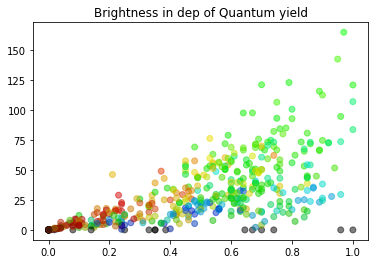

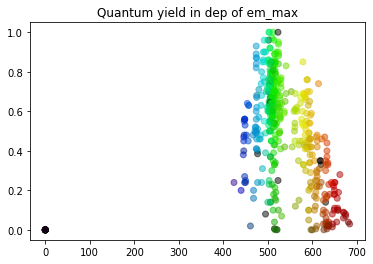

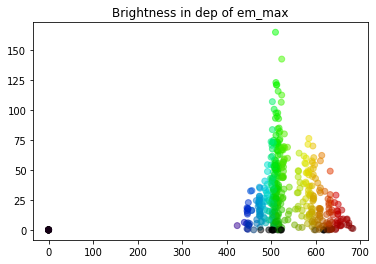

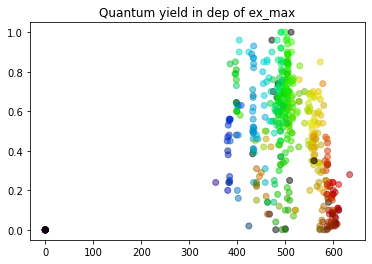

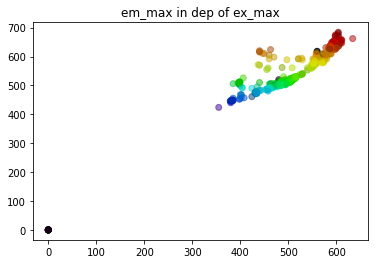

In [33]:
list_names = []
list_qy = []
list_brightness = []
list_em_max = []
list_ex_max = []
seq_array = []

for i in data:
    if(len(str(i['seq']))>200) and (len(str(i['seq']))<250):
        seq_array.append(i['seq'])
        list_names.append(i['name'])
        list_qy.append(clean(i['states'][0]['qy']))
        list_brightness.append(clean(i['states'][0]['brightness']))
        list_em_max.append(clean(i['states'][0]['em_max']))
        list_ex_max.append(clean(i['states'][0]['ex_max']))
    
print(len(seq_array))

max_brightness = max(list_brightness)
colorlist = []
for index, _ in enumerate(list_em_max):
    colorlist.append(wavelength_to_rgb(list_em_max[index]*1.0, factor=(list_brightness[index]/max_brightness)**(1/10)))


fig, ax = plt.subplots()
plt.scatter(list_qy, list_brightness, c=colorlist, alpha=.5)
ax.autoscale()
ax.set_title('Brightness in dep of Quantum yield')
plt.show()

fig, ax = plt.subplots()
plt.scatter(list_em_max, list_qy, c=colorlist, alpha=.5)
ax.autoscale()
ax.set_title('Quantum yield in dep of em_max')
plt.show()    

fig, ax = plt.subplots()
plt.scatter(list_em_max, list_brightness, c=colorlist, alpha=.5)
ax.autoscale()
ax.set_title('Brightness in dep of em_max')
plt.show()

fig, ax = plt.subplots()
plt.scatter(list_ex_max, list_qy, c=colorlist, alpha=.5)
ax.autoscale()
ax.set_title('Quantum yield in dep of ex_max')
plt.show()    

fig, ax = plt.subplots()
plt.scatter(list_ex_max, list_em_max, c=colorlist, alpha=.5)
ax.autoscale()
ax.set_title('em_max in dep of ex_max')
plt.show()   

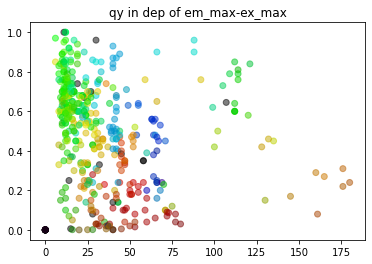

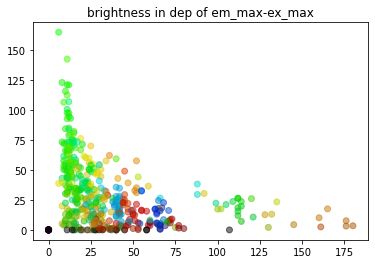

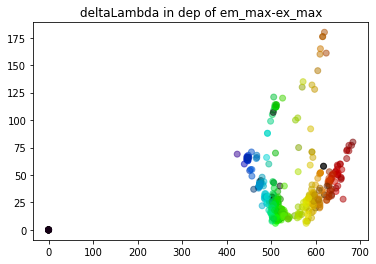

In [34]:
delta_lambda = []
for index,_ in enumerate(list_em_max):
    delta_lambda.append(list_em_max[index]-list_ex_max[index])
fig, ax = plt.subplots()
plt.scatter(delta_lambda, list_qy, c=colorlist, alpha=.5)
ax.autoscale()
ax.set_title('qy in dep of em_max-ex_max')
plt.show()   

fig, ax = plt.subplots()
plt.scatter(delta_lambda, list_brightness, c=colorlist, alpha=.5)
ax.autoscale()
ax.set_title('brightness in dep of em_max-ex_max')
plt.show()   

fig, ax = plt.subplots()
plt.scatter(list_em_max, delta_lambda, c=colorlist, alpha=.5)
ax.autoscale()
ax.set_title('deltaLambda in dep of em_max-ex_max')
plt.show()   

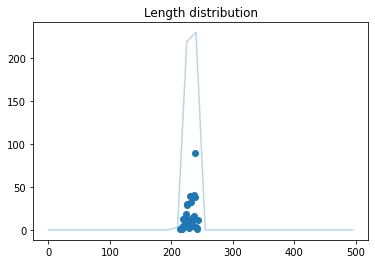

In [36]:
length_distribution_value = []
length_distribution_count = []
for seq in seq_array:
    length = len(str(seq))
    if(length in length_distribution_value):
        length_distribution_count[length_distribution_value.index(length)] += 1
    else:
        length_distribution_value.append(length)
        length_distribution_count.append(1)
        
length_histogram = np.array([length_distribution_value, length_distribution_count]).T.reshape(-1, 1, 2)
# print(length_histogram)
fig, ax = plt.subplots()

plt.scatter(length_distribution_value, length_distribution_count)

x_step = 15
x_list = np.arange(0,500,x_step)
y_list = np.zeros_like(x_list)+0.0

for index, value in enumerate(length_distribution_value):
    y_list[int(value/x_step + 0.5)] += length_distribution_count[index]

plt.plot(x_list, y_list, alpha = 0.3)
    
ax.autoscale()
ax.set_title('Length distribution')
plt.show()